# Library

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

import IPython.display as ipd
import librosa
import librosa.display

import pandas as pd
import numpy as np
import os
from tqdm import tqdm

# Sample Data

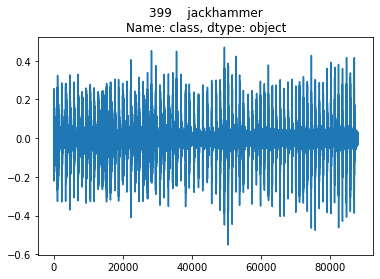

In [16]:
filename = 'UrbanSound8K/audio/fold9/105029-7-2-4.wav'
category = filename.split("/")[-1]

data,sample_rate = librosa.load(filename)
title = df[df['slice_file_name']==category]['class']

plt.title(str(title))
plt.plot(data)

ipd.Audio(data,rate=sample_rate)

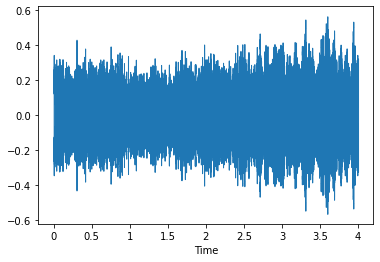

In [7]:
librosa.display.waveshow(data,sr=sample_rate)

# Spectogram

### 1 STFT

stft shape : (1025, 173)
amplitude_to_db shape : (1025, 173)


Text(0.5, 1.0, 'STFT Spectogram')

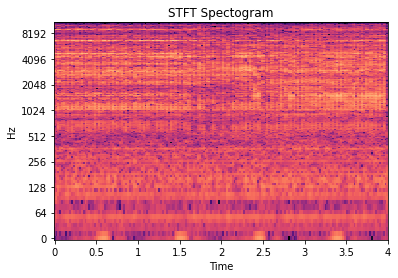

In [47]:
stft_spec = librosa.stft(data)
print(f"stft shape : {stft_spec.shape}")

Stft_db = librosa.amplitude_to_db(np.abs(stft_spec), ref=np.max)
print(f"amplitude_to_db shape : {Stft_db.shape}")

librosa.display.specshow(Stft_db, x_axis='time', y_axis='log')
plt.title("STFT Spectogram")

### 2 Mel

mel shape : (128, 173)
amplitude_to_db shape : (128, 173)


Text(0.5, 1.0, 'Mel Spectogram')

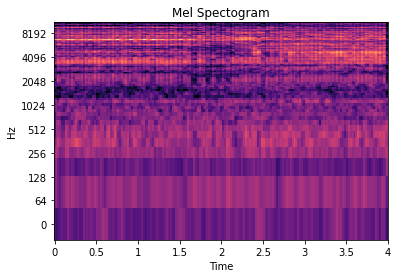

In [46]:
mel_spec = librosa.feature.melspectrogram(y=data,sr=sample_rate, n_mels=128)
print(f"mel shape : {mel_spec.shape}")

mel_db = librosa.amplitude_to_db(np.abs(mel_spec), ref=np.max)
print(f"amplitude_to_db shape : {mel_db.shape}")

librosa.display.specshow(mel_db, x_axis='time', y_axis='log')
plt.title("Mel Spectogram")

# Metadata

In [83]:
audio_dataset_path = "UrbanSound8K/audio/"
metadata = pd.read_csv("UrbanSound8K/metadata/UrbanSound8K.csv")
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [84]:
# Balanced Data
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

In [85]:
def get_features(file_name):
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None 
     
    return mfccsscaled

In [86]:
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=get_features(file_name)
    extracted_features.append([data,final_class_labels])

3554it [03:53, 19.34it/s]C:\Python310\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8326it [09:05, 24.42it/s]C:\Python310\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Python310\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [09:29, 15.34it/s]


In [87]:
### converting extracted_features to Pandas dataframe
df=pd.DataFrame(extracted_features,columns=['feature','class'])
df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.52066, 52.00812, -...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402218, 60.302044,...",children_playing


In [88]:
df.shape

(8732, 2)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   feature  8732 non-null   object
 1   class    8732 non-null   object
dtypes: object(2)
memory usage: 136.6+ KB


# Segregating data

In [90]:
### Split the dataset into independent and dependent dataset
X = np.array(df['feature'].tolist())
print(X.shape)

Y = np.array(df['class'].tolist())
print(Y.shape)

(8732, 40)
(8732,)


# Dumping data

In [92]:
import joblib
joblib.dump(X,"Inputs")
joblib.dump(Y,"Outputs")

['Outputs']